In [148]:
import numpy as np
import matplotlib.pyplot as plt

In [149]:
from sklearn import datasets

iris = datasets.load_iris();
X = iris.data[:,0:2];
y = iris.target;

X = X[y!=2]
y = y[y!=2]

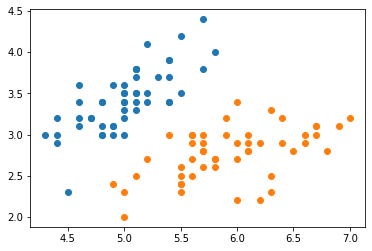

In [150]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [151]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier()

class_weight:完成样本标签平衡的参数

criterion：用来决定不纯度的计算方法的，输入”entropy“，使用信息熵（Entropy），输入”gini“，使用基尼系数（Gini Impurity）

random_state：用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显，低维度的数据（比如鸢尾花数据集），随机性几乎不会显现。
splitter：用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。这也是防止过拟合的一种方式。当你预测到你的模型会过拟合，用这两个参数来帮助你降低树建成之后过拟合的可能性。

# 剪枝参数

max_depth：限制树的最大深度，超过设定深度的树枝全部剪掉

min_samples_leaf：最小样本数量，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生

 min_samples_split：一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生。

max_features：限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃。

min_impurity_split/min_impurity_decrease：限制信息增益的大小，信息增益小于设定数值的分枝不会发生。

In [152]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

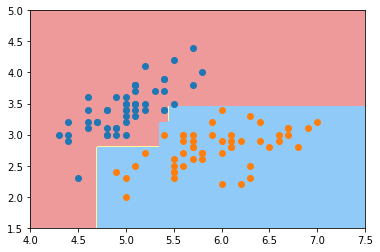

In [153]:
plot_decision_boundary(dt_clf, axis=[4.0, 7.5, 1.5, 5.0])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

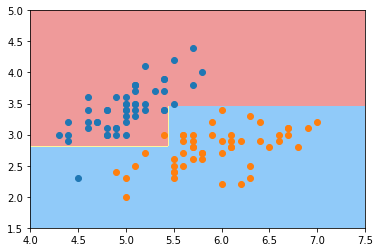

In [154]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)#树的深度
dt_clf2.fit(X, y)

plot_decision_boundary(dt_clf2, axis=[4.0, 7.5, 1.5, 5.0])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

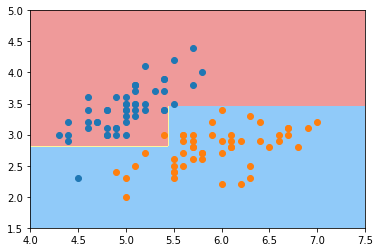

In [155]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)#最小样本数量
dt_clf3.fit(X, y)

plot_decision_boundary(dt_clf3, axis=[4.0, 7.5, 1.5, 5.0])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

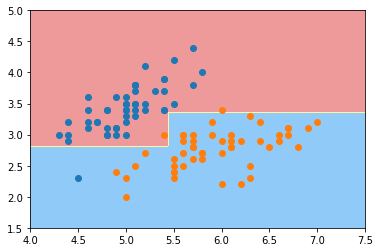

In [156]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)#叶子节点的最小样本数量
dt_clf4.fit(X, y)

plot_decision_boundary(dt_clf4, axis=[4.0, 7.5, 1.5, 5.0])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

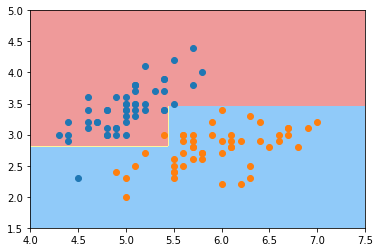

In [157]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)#叶子节点的数量
dt_clf5.fit(X, y)

plot_decision_boundary(dt_clf5, axis=[4.0, 7.5, 1.5, 5.0])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()